In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def genData(D):
    # generate DxD matrix (random normal numbers, mean = 0, std = 1)
    A = np.random.normal(0,1,(D,D))
    # generate v vector (random normal numbers, mean = 0, std = 1)
    v = np.random.normal(0,1,(D,1))
    # randomly choose k
    k = np.random.randint(D)
    # generate e_k column
    e_k = np.array([[int(i==k)] for i in range(D)])
    return A, v, e_k

In [3]:
def gradDescent(alpha, A, v, e_k):
    # store Fv at each iteration
    F = []
    flag = False
    iter = 0
    while not (flag):
        iter += 1
        pred = A @ v
        Fv = sum(np.square(pred - e_k))
        F.append(Fv)
        v = v - (alpha * (np.transpose(A) @ (pred - e_k)))
        # print("Iteration {}: Cost={}".format(iter, Fv))
        # break loop if Fv <= 0.00001
        if Fv <= 0.00001:
            flag = True
    return F, iter

In [4]:
def optimgradDescent(A, v, e_k):
    # store Fv at each iteration
    F = []
    flag = False
    iter = 0
    while not (flag):
        iter += 1
        pred = A @ v
        Fv = sum(np.square(pred - e_k))
        F.append(Fv)
        gradient = np.transpose(A) @ (pred - e_k)
        alpha = ((np.transpose(v) @ (np.transpose(A) @ (A @ gradient))) - (np.transpose(gradient) @ (np.transpose(A) @ e_k))) / \
            (np.transpose(gradient) @ (np.transpose(A)@ (A @ gradient)))
        v = v - (alpha * gradient)
        # print("Iteration {}: alpha={}, Cost={}".format(iter, alpha, Fv))
        # break loop if Fv <= 0.00001
        if Fv <= 0.00001:
            flag = True
    return F, iter

In [5]:
# set alpha
alpha = 0.01

# set dimension
D = 3
# generate random matrix and vector
[A, v, e_k] = genData(D)
# run gradient descent for D = 3
[F_grad3, iter_grad3] = gradDescent(alpha, A, v, e_k)
[F_optimgrad3, iter_optimgrad3] = optimgradDescent(A, v, e_k)

# set dimension
D = 10
# generate random matrix and vector
[A, v, e_k] = genData(D)
# run gradient descent for D = 10
[F_grad10, iter_grad10] = gradDescent(alpha, A, v, e_k)
[F_optimgrad10, iter_optimgrad10] = optimgradDescent(A, v, e_k)

# set dimension
D = 20
# generate random matrix and vector
[A, v, e_k] = genData(D)
# run gradient descent for D = 20
[F_grad20, iter_grad20] = gradDescent(alpha, A, v, e_k)
[F_optimgrad20, iter_optimgrad20] = optimgradDescent(A, v, e_k)

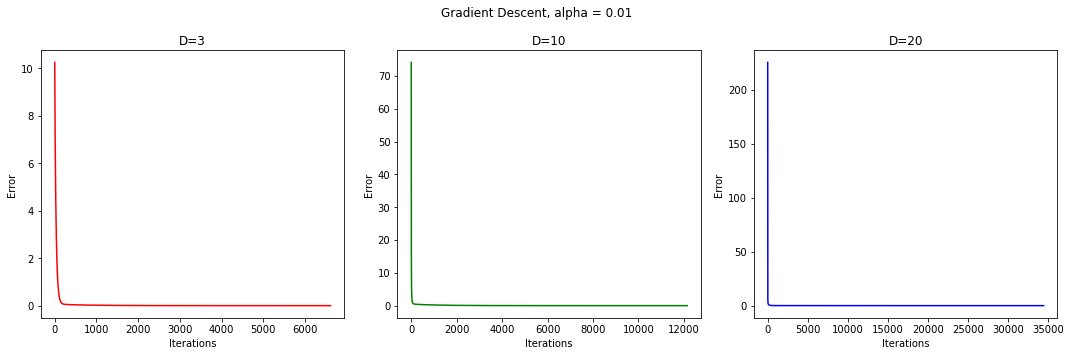

In [6]:
# plot graph for different dimensions, same alpha = 0.01
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle("Gradient Descent, alpha = 0.01")
axs[0].plot(F_grad3, color='red')
axs[0].set_title("D=3")
axs[1].plot(F_grad10, color='green')
axs[1].set_title("D=10")
axs[2].plot(F_grad20, color='blue')
axs[2].set_title("D=20")
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Error')
fig.tight_layout()

**We can observe here that this process does converge to the desired solution, that is, minimising cost or error to 0.**
**We can also observe that the decay is exponential in time and its form is same for different values of A and D**

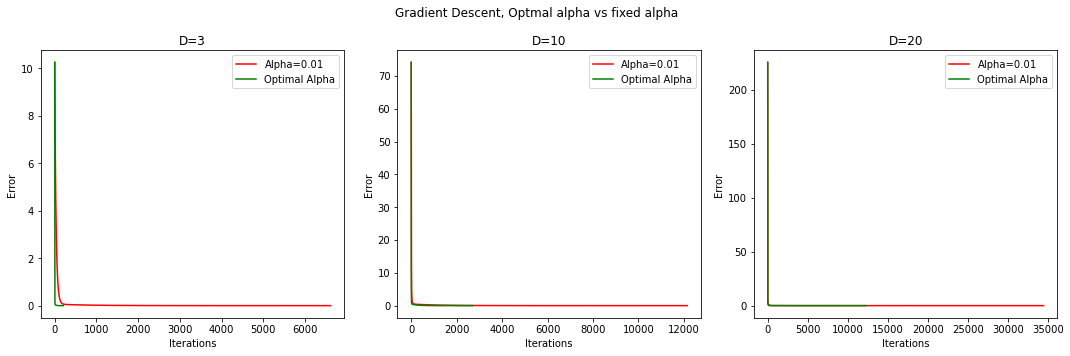

In [7]:
# plot graph for different dimensions, fixed alpha vs optimal alpha
fig, axs = plt.subplots(1, 3)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle("Gradient Descent, Optmal alpha vs fixed alpha")
axs[0].plot(F_grad3, color='red')
axs[0].plot(F_optimgrad3, color="green")
axs[0].set_title("D=3")
axs[0].legend(["Alpha=0.01", "Optimal Alpha"], loc="best")
axs[1].plot(F_grad10, color='red')
axs[1].plot(F_optimgrad10, color="green")
axs[1].set_title("D=10")
axs[1].legend(["Alpha=0.01", "Optimal Alpha"], loc="best")
axs[2].plot(F_grad20, color='red')
axs[2].plot(F_optimgrad20, color="green")
axs[2].set_title("D=20")
axs[2].legend(["Alpha=0.01", "Optimal Alpha"], loc="best")
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Error')
fig.tight_layout()

**Using optimal alpha converges exceptionally faster as compared to using fixed alpha (alpha = 0.01). The form of the error decay remains exponential with optimal alpha as well.**

In [8]:
# print result for D=3
print("** Dimension = 3 **")
print("Grad Descent:             minimum Fv = {}, Total iterations = {}".format(F_grad3[len(F_grad3)-1], iter_grad3))
print("Optim alpha Grad Descent: minimum Fv = {}, Total iterations = {}".format(F_optimgrad3[len(F_optimgrad3)-1], iter_optimgrad3))
d_fixedAlpha3 = abs(F_grad3[len(F_grad3)-1] - F_grad3[0])/iter_grad3
d_optimAlpha3 = abs(F_optimgrad3[len(F_optimgrad3)-1] - F_optimgrad3[0])/iter_optimgrad3
print("Fixed Alpha Decay Rate = {}, Optimal Alpha Decay Rate = {}\n".format(d_fixedAlpha3, d_optimAlpha3))

# print result for D=10
print("** Dimension = 10 **")
print("Grad Descent:             minimum Fv = {}, Total iterations = {}".format(F_grad10[len(F_grad10)-1], iter_grad10))
print("Optim alpha Grad Descent: minimum Fv = {}, Total iterations = {}".format(F_optimgrad10[len(F_optimgrad10)-1], iter_optimgrad10))
d_fixedAlpha10 = abs(F_grad10[len(F_grad10)-1] - F_grad10[0])/iter_grad10
d_optimAlpha10 = abs(F_optimgrad10[len(F_optimgrad10)-1] - F_optimgrad10[0])/iter_optimgrad10
print("Fixed Alpha Decay Rate = {}, Optimal Alpha Decay Rate = {}\n".format(d_fixedAlpha10, d_optimAlpha10))

# print result for D=20
print("** Dimension = 20 **")
print("Grad Descent:             minimum Fv = {}, Total iterations = {}".format(F_grad20[len(F_grad20)-1], iter_grad20))
print("Optim alpha Grad Descent: minimum Fv = {}, Total iterations = {}".format(F_optimgrad20[len(F_optimgrad20)-1], iter_optimgrad20))
d_fixedAlpha20 = abs(F_grad20[len(F_grad20)-1] - F_grad20[0])/iter_grad20
d_optimAlpha20 = abs(F_optimgrad20[len(F_optimgrad20)-1] - F_optimgrad20[0])/iter_optimgrad20
print("Fixed Alpha Decay Rate = {}, Optimal Alpha Decay Rate = {}\n".format(d_fixedAlpha20, d_optimAlpha20))

** Dimension = 3 **
Grad Descent:             minimum Fv = [9.99831568e-06], Total iterations = 6612
Optim alpha Grad Descent: minimum Fv = [9.71012918e-06], Total iterations = 207
Fixed Alpha Decay Rate = [0.001551], Optimal Alpha Decay Rate = [0.04954215]

** Dimension = 10 **
Grad Descent:             minimum Fv = [9.99390565e-06], Total iterations = 12147
Optim alpha Grad Descent: minimum Fv = [9.97219877e-06], Total iterations = 2708
Fixed Alpha Decay Rate = [0.00610177], Optimal Alpha Decay Rate = [0.02737009]

** Dimension = 20 **
Grad Descent:             minimum Fv = [9.99780439e-06], Total iterations = 34474
Optim alpha Grad Descent: minimum Fv = [9.9985771e-06], Total iterations = 12279
Fixed Alpha Decay Rate = [0.00654501], Optimal Alpha Decay Rate = [0.01837548]



**To calculate average decay rate, use formula $ abs(max(cost) - min(cost))/totalIterations $, this clearly shows that the decay rate with optimal alpha is greater and thus the convergence rate is faster with optimal alpha.**